# Previsão de preço de um veiculo - **Regressão**

## Introdução

CarDecko é um site da Índia para a venda de automóveis. A base de dados que utilizaremos provem desse site e possui dados de venda de automóveis na Índia.

## Dados

A base da dados (em anexo) é composta por 4340 instâncias e possui 8 colunas sendo:

- **name**: Nome do modelo do carro;
- **year**: Ano de fabricação do carro;
- **selling_price**: Preço de venda do carro;
- **km_driven**: Quantidade de quilômetros rodados do veiculo;
- **fuel**: Combustível utilizado pelo carro; (Petrol = gasolina); 
- **seller_type**: Tipo do vendedor; (Particular ou profissional);
- **transmission**: Tipo de transmissão; (Câmbio);
- **owner**: Quantidade de donos anteriores;


## Tarefa

A sua tarefa é criar um modelo de **Regressão** que possa prever o valor de um carro na Índia, com a melhor precisão possível.

## Entrega do trabalho 

Cada integrante do grupo deverá entregar na tarefa do Teams um arquivo de notebook (.ipynb) contendo todo o código desenvolvido (células de código) e explicações de cada passo dado no projeto (células markdown). Caso algum integrante esqueça de entregar sua cópia do trabalho ele poderá ficar sem nota. Importante: todos os integrantes do grupo devem entregar o mesmo trabalho. 

## Desenvolvimento 

Ao menos dois algoritmos diferentes de regressão devem ser testados na tarefa sendo que o modelo deverá ser construído usando o melhor algoritmo. Não se esqueçam da etapa de aperfeiçoamento do modelo após escolher um algoritmo. 

## Grupo 

O trabalho será desenvolvido em grupos de 2 até 4 alunos. O nome dos integrantes deve constar numa célula de markdown no início do trabalho. Respeitem os tamanhos dos grupos. 

## FAQ 

- Trabalhos iguais em grupos diferentes: Zero para ambos os grupos. Cuidado com o que vocês compartilham entre si. 

- Usei uma IA para fazer os códigos pra mim, por isso ficou igual ao do outro grupo: Zero para ambos os grupos. Usem as IA (GPT e afins) com responsabilidade. Não sai copiando e colando qualquer coisa que eles respondem... Usem a cabeça... 

- Achei um desafio do Kagle igualzinho a esse e eu tomei base nele por isso ficou igual ao do meu colega: Novamente, Não sai copiando e colando qualquer coisa que vocês acharem... Use trabalhos prontos como inspiração, não como resolução. 

- Segui um tutorial do YouTube, por isso ficou igual ao do outro grupo: Zero 

- Trabalho encontrado na internet igual ao do grupo: Zero 

## Equipe

- Murilo Ramalho da Mata
- Camila Gomes da Silva Casa

---

In [39]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


- importando bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

CAR DETAILS FROM CAR DEKHO: [base dados](./CAR_DEKHO.csv)

In [38]:
cars = pd.read_csv('CAR_DEKHO.csv')
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


- convertendo colunas

In [41]:
categorical_features = ['fuel','seller_type','transmission','owner']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

- dividindo e criando a pipeline

In [42]:
X = cars.drop(columns=['selling_price','name'])
Y = cars['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

- treinando

In [43]:
model.fit(X_train, Y_train)

c:\Users\graff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', LinearRegression())])

- previsão

In [44]:
Y_pred = model.predict(X_test)

- graficos

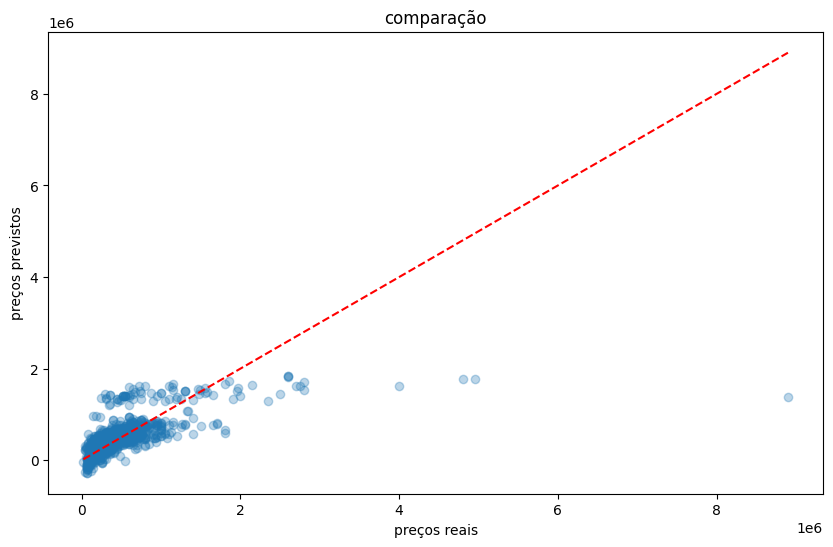

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.xlabel('preços reais')
plt.ylabel('preços previstos')
plt.title('comparação')
plt.plot([min(Y_test), max(Y_test)],[min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

In [46]:
# Calculando a porcentagem de acerto dentro de uma margem de 10% do valor real
margem = 0.10
acertos = (abs(residuals) <= margem * y_test).mean()
percentual_acerto = acertos * 100

print(f"Porcentagem de previsões dentro de uma margem de 10%: {percentual_acerto:.2f}%")

Porcentagem de previsões dentro de uma margem de 10%: 13.02%
